# Data Visualization with Pandas

## Introduction
In this lesson, we will be looking at data visualization using Pandas and Matplotlib - modules that we have already seen and used. Pandas uses matplotlib under the hood for data visualization, and provides some handy yet efficient methods for visualizing data from DataFrames.

## Objectives
You will be able to:
* Make visualizations using pandas built-in methods 

## Styling a Plot

Before we dive into data visualization in Pandas, it would be a good idea to get a quick introduction to Matplotlib's `style` module. Matplotlib comes with a number of predefined styles to customize the plots. These styles generally change the look of plots by changing color maps, line styles, backgrounds etc. Because Pandas is built on Matplotlib for visualizations, this will change the style of our Pandas graphs as we'll see below: 

We can use `plt.style.available` to see a list of predefined styles available in Matplotlib. The `%matplotlib notebook` magic command below optimizes the plots for displaying them in jupyter notebooks. 

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

So this provides us with a list of styles available. In order to use a style, we simply give the command `plt.style.use(<style name>)`. Let's use `ggplot` for now and see how it changes the default style. Feel free to try other styles and see how they impact the look and feel of the plots! 

In [18]:
plt.style.use('ggplot')

## Create a dataset for visualization

Pandas offers excellent built-in visualization features. It's particularly useful for exploratory data analysis of data that's stored as Pandas Series or DataFrame. 

Let's build a synthetic temporal DataFrame with the following steps:

* Data frame with three columns A, B, and C
* For data in each column, we will use a random number generator to generate 365 numbers (to reflect days in a year) using `np.random.randn()` 
* Using numpy's `.cumsum()` (cumulative sum) method, we will cumulatively sum the generated random numbers in each column  
* Offset column B by +25 and column C by -25 with respect to Column A, which will remain unchanged
* Using `pd.date_range()`, set the index to be every day in 2018 (starting from 1st of January) 

We'll also set a seed for controlling the randomization, allowing us to reproduce the data. 

> It is always a good idea to set a random seed when dealing with probabilistic outputs. 

Let's give this a go:

In [19]:
import pandas as pd
import numpy as np

np.random.seed(777)

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
data.head()

,A,B,C
2018-01-01,-0.468209,25.435990,-22.997943
2018-01-02,-1.291034,26.479220,-22.673404
2018-01-03,-1.356414,25.832356,-21.669027
2018-01-04,-2.069776,26.456703,-21.408310
2018-01-05,-1.163425,25.864281,-22.685208


This is great. Now we have a dataset with three columns that we can call time-series. Let's inspect our data visually. To plot this data we can simply use the `.plot()` method on the DataFrame. 

<IPython.core.display.Javascript object>


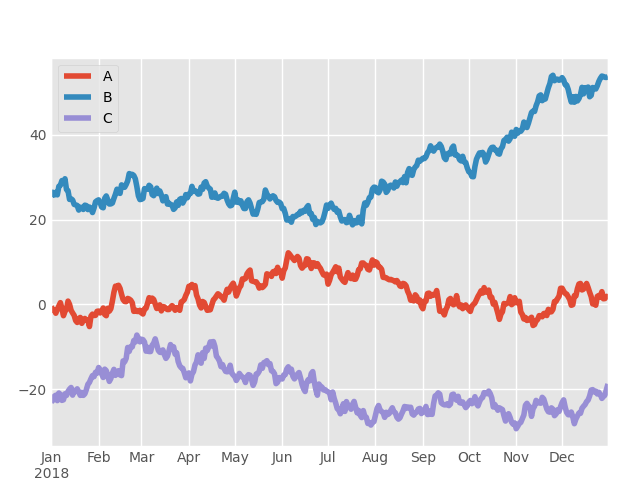

<AxesSubplot:>

In [20]:
plt.style.use('ggplot')
data.plot()

This is sweet. So, we didn't have to define our canvas, axes or labels etc. This is where Pandas really shines. The `DataFrame.plot()` method is just a simple wrapper around `plt.plot()` that draws line plots. So when we call `data.plot()`, we get a line graph of all the columns in the data frame with labels. 

Also, notice how this plot looks different in terms of look and feel. This is because of the style we used earlier. Additionally, the `%matplotlib notebook` makes the plots interactive. Try clicking, dragging, and zooming on the plot above to see how this works. 

> Try changing it to a different style and see which one would you prefer. 

## Scatter Plots

The `DataFrame.plot()` allows us to plot a number of different kinds of plots. We can select which plot we want to use by specifying the `kind` parameter. Here is a complete list from the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html): 
```
kind : str

‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot
```



Let's try and create a scatter plot that takes the `A` and `B` columns of `data`.  We pass in `'scatter'` to the `kind` parameter to change the plot type. Also note, putting a semicolon at the end of plotting function would mute any extra text out. 

<IPython.core.display.Javascript object>


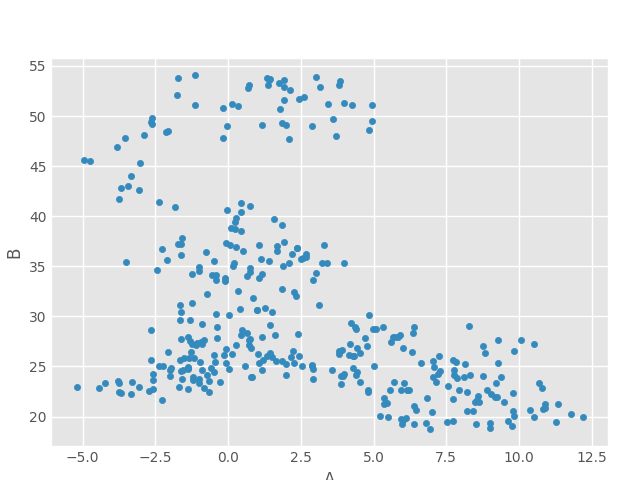

In [21]:
data.plot('A', 'B', kind='scatter');

We can also choose the plot kind by using the methods `dataframe.plot.kind` instead of passing the `kind` argument as we'll see below. Lets now create another scatter plot with points varying in color and size. We'll perform the following steps:

* Use `df.plot.scatter()` and pass in columns `'A'` and `'C'`  
* Set the color `c` and size `s` of the data points to change based on the value of column B 
* Choose the color palette by passing a string into the parameter `colormap` 

> A complete list of colormaps is available at [Official Documentation](https://matplotlib.org/examples/color/colormaps_reference.html). 

Let's see this in action:

<IPython.core.display.Javascript object>


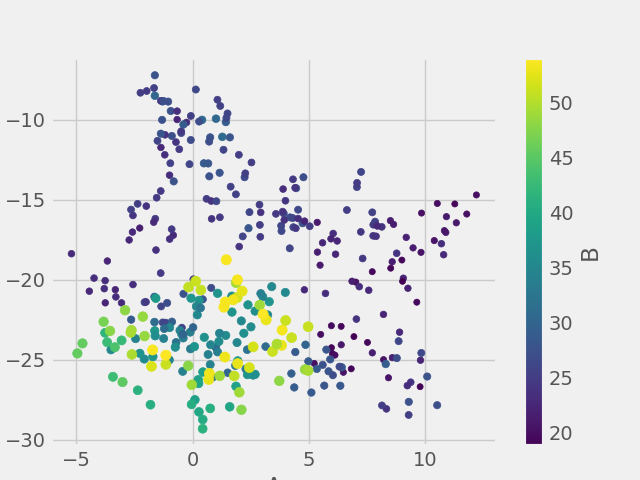

In [8]:
data.plot.scatter('A', 'C', 
                  c = 'B',
                  s = data['B'],
                  colormap = 'viridis');

Here,  A and C columns plotted against one another with graduating color and changing the size and based on the values of the `'B'` column. 

`df.plot.scatter()` returns a `matplotlib.axes._subplot` object so we can perform modification on these objects just like we would do in matplotlib plots as shown below. Here we'll change the aspect ratio for the scatter plot generated above, and add a title using `axes` properties.

<IPython.core.display.Javascript object>


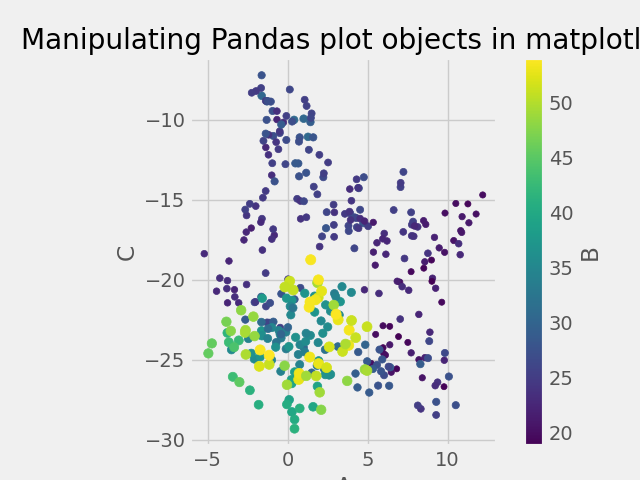

Text(0.5, 1.0, 'Manipulating Pandas plot objects in matplotlib')

In [9]:
ax = data.plot.scatter('A', 'C', 
                        c = 'B',
                        s = data['B'],
                        colormap = 'viridis');
ax.set_aspect('equal')
ax.set_title('Manipulating Pandas plot objects in matplotlib')

> Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C. 

## Some other plots

So we saw line plots and scatter plots above. We can also plot histograms, boxplots, and kernel density estimations in almost the same manner. Here are quick few examples of each using the same dataset as above:

<IPython.core.display.Javascript object>


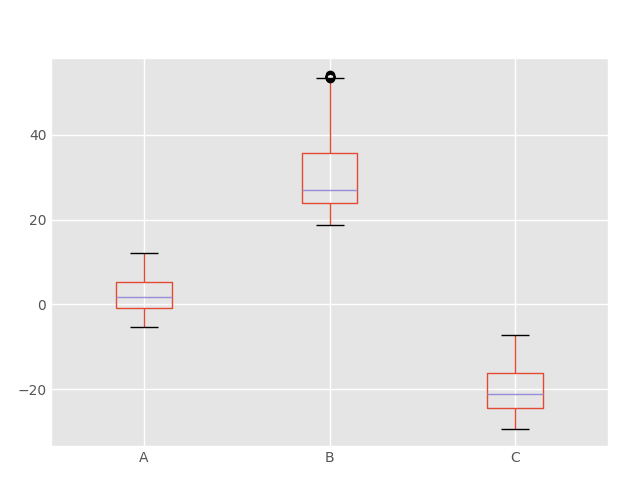

In [22]:
# Box Plots
data.plot.box();

<IPython.core.display.Javascript object>


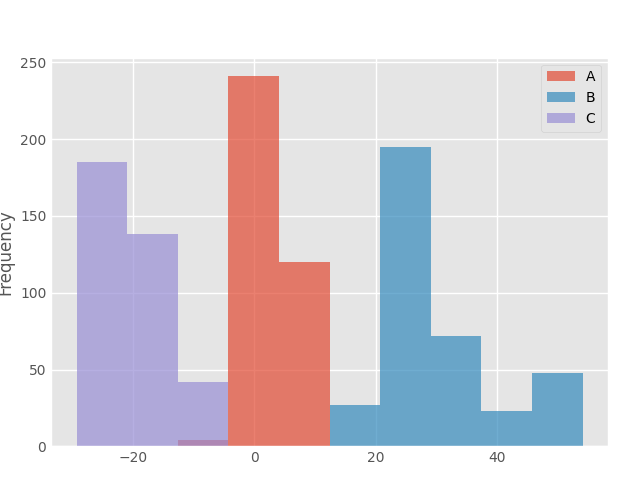

In [23]:
# Histograms 
# Setting alpha level to inspect distribution overlap
data.plot.hist(alpha = 0.7); 

<IPython.core.display.Javascript object>


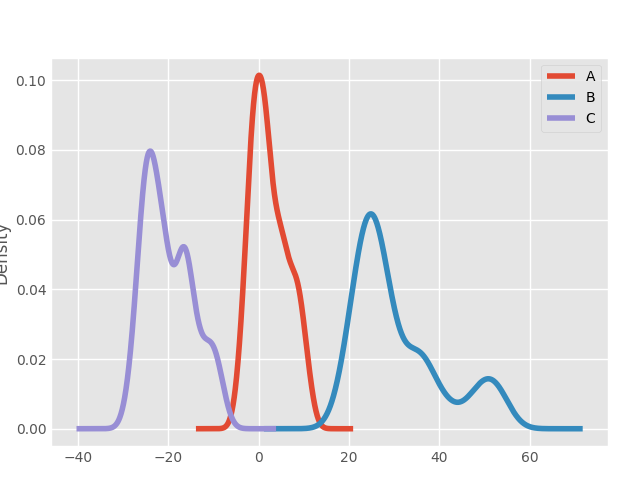

In [24]:
# Kernel Density Estimate plots
# Useful for visualizing an estimate of a variable's probability density function. 
# Kernel density estimation applications will be covered later
data.plot.kde();

> You are encouraged to experiment more with how these plots are generated. Try to add more personalizations to the plots above as shown in the scatterplot example. 

## Visualizing High Dimensional Data

Pandas also has plotting tools that help with visualizing high dimensional data, i.e., way too many columns/variables to inspect individually.  Let's explore some of these features by loading in the `iris` flower dataset. 

> The `iris` dataset is a classic multivariate dataset, which includes the sepal length, sepal width, petal length, and petal width for hundreds of samples of three species of the iris flower. 

The iris dataset is available in your folder as `'iris.csv'`.

In [25]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Matrix

Pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame. A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. 

> The **scatter matrix** creates scatter plots between the different variables and histograms along the diagonals. 

This allows us to quickly see some of the more obvious patterns in the dataset. Let's use it to visualize the iris DataFrame and see what insights we can gain from our data. We will use the method `pd.tools.plotting.scatter_matrix()` and pass in our dataset as an argument.

<IPython.core.display.Javascript object>


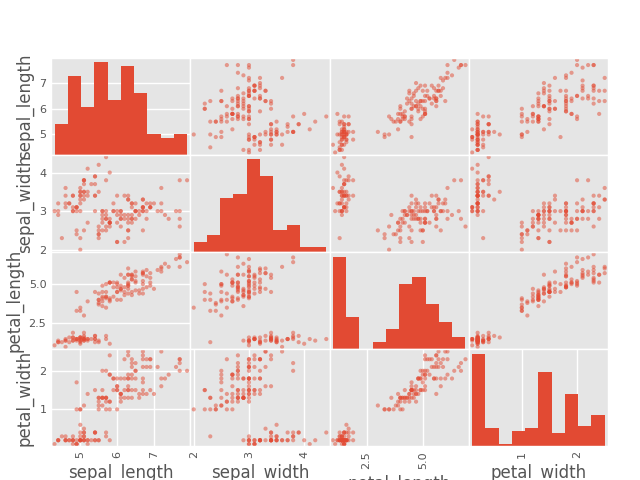

In [26]:
pd.plotting.scatter_matrix(iris);

Looking at above scatter plots generated by `scatter_matrix()`, it appears that there are some distinct groupings of the values which could be indicative of clustering/ grouping etc. Such handy visual analytics allow us to better decide a course of action for in-depth predictive analysis. 

### Parallel Plots

Pandas includes a plotting tool for creating parallel coordinates plots which could be a great way to visualize multivariate data.

>Parallel coordinate plots are a common way of visualizing high dimensional multivariate data. Each variable in the dataset corresponds to an equally-spaced, parallel, vertical line. The values of each variable are then connected by lines between for each individual observation. 

Let's create a parallel plot for the 4 predictor variables in the iris dataset and see if we can make any further judgments about the nature of data. We will use the `pd.plotting.parellel_coordinates()` function and pass in the `iris` dataset with the response column (species) as an argument, just like we saw above. Let's also apply some customizations.

* Color the lines by class given in `'species'` column (this will allow handy inspection to see any patterns). 

<IPython.core.display.Javascript object>


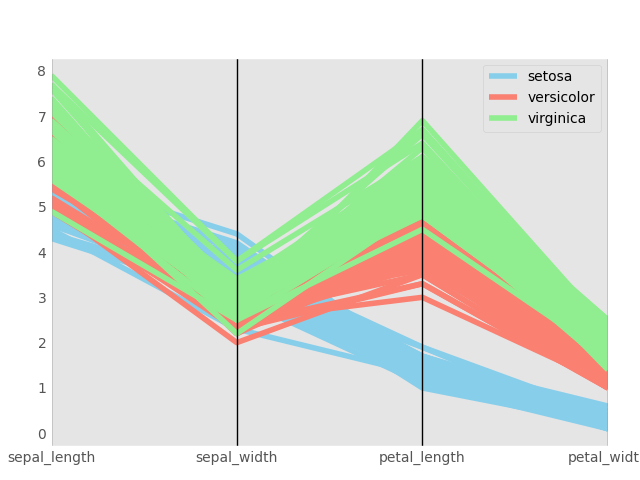

In [27]:
# Set a colormap with 3 colors to show species
colormap = ('skyblue', 'salmon', 'lightgreen')
plt.figure()
pd.plotting.parallel_coordinates(iris, 'species', color=colormap);

### So, what do we learn from parallel plot ?

Looking at our parallel plot, we can see that the petal length and petal width are two variables that split the different species fairly clearly. Iris virginica has the longest and the widest petals among all flower types. Iris setosa has the shortest and narrowest petals etc. 

These initial set of statistical observations go a long way in the field of data analytics. We may decide to apply extra pre-processing to the data, or decide which are the best predictor variables for our analysis - based on the results of quick visualizations in pandas. 

## Level Up: (Optional)

In the parallel plot above, we can see that feature values have different ranges. We can further simplify this plot by first normalizing the dataset (i.e. scaling all feature values between 0 and 1) and then plotting a parallel plot. 
[Here is an article](https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/) with a short, yet insightful, description of normalizing and scaling data in Python. 

## Summary

In this lesson, we learned about the relationship between Pandas visualizations and Matplotlib objects. We saw how we can customize plots with colormaps and plot styles. We plotted some uni-variate data using scatter plots, box plots, line plots, and KDEs, as well as multivariate (multidimensional) plotting using scatter matrix and parallel coordinate plots. In the future, we will look into the `seaborn` plotting library and see how that can further simplify our visualization tasks. 